## CSV to GeoDataFrame  

In [1]:
import os 
import pandas as pd 
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Display all columns when looking at dfs 
pd.set_option("display.max.columns", None)

# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

# Drop column 
power_plants = power_plants.drop(columns='unnamed: 0')

power_plants.head(3)


,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


Lets use the long and lat columns to create a geodataframe 

These indicate the location of the power plants in the NAD93 CRS (EPSG:3269). 

We can use the `geopandas` func `points_from_xy()`

In [3]:
# Create points from lat and long
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)
# Create a geodataframe
power_plants = gpd.GeoDataFrame(power_plants, # Dataframe 
                                geometry=points, # Specfiy geom column
                                crs='EPSG:4269') # Specify crs 
power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)


In [4]:
# View geometry 
power_plants['geometry']

0        POINT (-160.49722 55.33972)
1         POINT (-87.35682 33.45867)
2         POINT (-88.01030 31.00690)
3         POINT (-86.28306 32.58389)
4        POINT (-106.37500 31.75690)
                    ...             
12004     POINT (-82.37595 35.38014)
12005     POINT (-79.36770 36.00932)
12006     POINT (-79.73631 35.27343)
12007     POINT (-73.91048 42.87657)
12008     POINT (-77.27590 41.83800)
Name: geometry, Length: 12009, dtype: geometry

In [5]:
print('CRS: ', power_plants.crs)
print('is geographic? ', power_plants.crs.is_geographic)

CRS:  EPSG:4269
is geographic?  True


<Axes: >

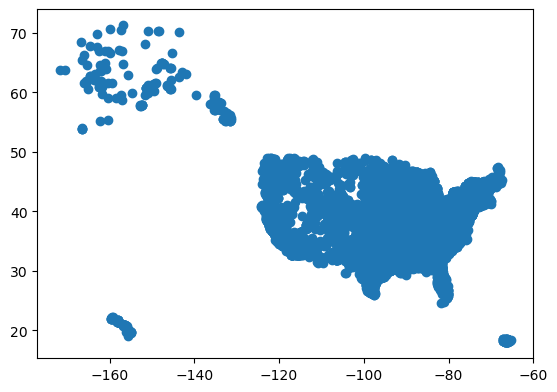

In [6]:
# Plot it 
power_plants.plot()

## Import shapefile 

Let's import the TIGER shapefile 

In [ ]:
# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')


In [8]:
states = gpd.read_file(fp)

states.head(3)

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
